In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.losses import categorical_crossentropy
from keras.optimizers import adam
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [2]:
mnist = np.load("../datasets/mnist_train_small.npy")

In [3]:
X, y = mnist[:, 1:], mnist[:, 0]

In [4]:
y_oe = (y % 2) == 0 

In [5]:
ohe = OneHotEncoder(categories="auto")

In [6]:
y_hot = ohe.fit_transform(y.reshape(-1, 1))

In [7]:
y_hot_oe = ohe.fit_transform(y_oe.reshape(-1, 1))

In [8]:
in_layer = Input((784,))
d1 = Dense(400, activation="tanh")(in_layer)
d2 = Dense(200, activation="tanh")(d1)
d3 = Dense(100, activation="tanh")(d2)
d41 = Dense(50, activation="tanh")(d3)
d42 = Dense(30, activation="tanh")(d3)
o1 = Dense(10, activation="softmax", name="out1")(d41)
o2 = Dense(2, activation="softmax", name="out2")(d42)


In [9]:
model = Model(inputs=[in_layer], outputs=[o1, o2])

In [10]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 400)          314000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 200)          80200       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 100)          20100       dense_2[0][0]                    
____________________________________________________________________________________________

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(
# ...     X, y_hot, test_size=0.33, random_state=42)

In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
model.fit(X, [y_hot, y_hot_oe], epochs=10)

Epoch 1/10
19999/19999 [==============================] - 7s 340us/step - loss: 0.8336 - out1_loss: 0.5878 - out2_loss: 0.2459 - out1_accuracy: 0.8154 - out2_accuracy: 0.9000
Epoch 2/10
19999/19999 [==============================] - 7s 337us/step - loss: 0.6424 - out1_loss: 0.4533 - out2_loss: 0.1892 - out1_accuracy: 0.8547 - out2_accuracy: 0.9251
Epoch 3/10
19999/19999 [==============================] - 7s 354us/step - loss: 0.5928 - out1_loss: 0.4179 - out2_loss: 0.1749 - out1_accuracy: 0.8667 - out2_accuracy: 0.9346
Epoch 4/10
19999/19999 [==============================] - 7s 343us/step - loss: 0.5499 - out1_loss: 0.3826 - out2_loss: 0.1673 - out1_accuracy: 0.8786 - out2_accuracy: 0.9360
Epoch 5/10
19999/19999 [==============================] - 6s 310us/step - loss: 0.5060 - out1_loss: 0.3563 - out2_loss: 0.1497 - out1_accuracy: 0.8881 - out2_accuracy: 0.9442
Epoch 6/10
19999/19999 [==============================] - 6s 319us/step - loss: 0.4820 - out1_loss: 0.3358 - out2_loss: 0.146

In [14]:
model.evaluate(X, [y_hot, y_hot_oe])

19999/19999 [==============================] - 2s 114us/step


[0.36249981786532487,
 0.2537233233451843,
 0.10878369212150574,
 0.9210960268974304,
 0.961698055267334]

3
ODD


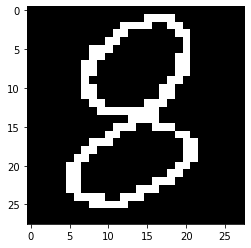

In [31]:
img = load_img("../datasets/nums/eight.jpeg", target_size=(28, 28), grayscale=True)
type(img)
plane = (np.array(img) < 100).astype(int) * 255
plt.imshow(plane, cmap="gray")
val, oe = model.predict(np.array([plane.flatten()]))
print(val.argsort(axis=1)[0][-1])

ans = oe.argsort(axis=1)[0][1]
if ans == 0:
    print("ODD")
else:
    print("EVEN")